In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
rome = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Airbnb listings in Rome (August 2015).csv',
                   encoding='utf8')

In [3]:
rome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15703 entries, 0 to 15702
Data columns (total 16 columns):
Unnamed: 0              15703 non-null int64
room_id                 15703 non-null int64
host_id                 15703 non-null int64
room_type               15703 non-null object
city                    0 non-null float64
neighborhood            15703 non-null object
reviews                 15703 non-null int64
overall_satisfaction    10656 non-null float64
accommodates            12861 non-null float64
bedrooms                15670 non-null float64
bathrooms               15537 non-null float64
price                   15703 non-null float64
minstay                 14320 non-null float64
latitude                15703 non-null float64
longitude               15703 non-null float64
collected               15703 non-null object
dtypes: float64(9), int64(4), object(3)
memory usage: 1.9+ MB


In [4]:
rome.drop('city', axis=1, inplace=True)

In [5]:
rome.bedrooms.isnull().sum()

33

In [6]:
rome = rome[rome['bedrooms'].notnull()]

In [7]:
rome.bathrooms[rome.bathrooms==0].value_counts()

0.0    61
Name: bathrooms, dtype: int64

In [8]:
# We have removed the rows that had "0" bathrooms. We are assuming every house comes with atleast 1 bathroom.
rome = rome[rome['bathrooms'] != 0.]

In [9]:
rome.sort_values('bedrooms', inplace=True)

In [10]:
rome = rome.reset_index()

In [11]:
rome.drop(['index','Unnamed: 0'], axis=1, inplace=True)

In [12]:
rome.head(2)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,6408911,5056483,Entire home/apt,I Municipio,0,NaN,2.0,0.0,1.0,167.0,3.0,41.890418,12.469850,2015-08-30 03:34:51.607302
1,7072260,17215980,Entire home/apt,VII Municipio,2,4.5,4.0,0.0,1.0,52.0,2.0,41.891317,12.561203,2015-08-29 22:16:46.220345


In [13]:
# Imputation for Bathrooms
rome.bathrooms.fillna(method='bfill',inplace=True)


In [14]:
import numpy as np

In [16]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(rome.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [17]:
df1 = df1.reset_index(level = 0)

In [18]:
df1.sort('host_id', ascending=False, inplace=True)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [19]:
df1

,neighborhood,reviews,host_id,price
0,I Municipio,119482,6825,137.873260
15,XVII Municipio,20596,2164,114.579482
4,IX Municipio,15479,1236,77.060680
16,XVIII Municipio,11625,1114,103.964991
14,XVI Municipio,12059,929,100.216362
1,II Municipio,6737,856,110.651869
2,III Municipio,8955,616,84.206169
6,VI Municipio,8881,598,57.344482
9,XI Municipio,3908,426,92.579812
8,X Municipio,2751,246,65.573171


In [20]:
def standardize(S):
    scaler = preprocessing.StandardScaler().fit(S)
    return scaler.transform(S)

In [21]:
df1.host_id = standardize(df1.host_id)
df1.reviews = standardize(df1.reviews)
df1.price = standardize(df1.price)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWar

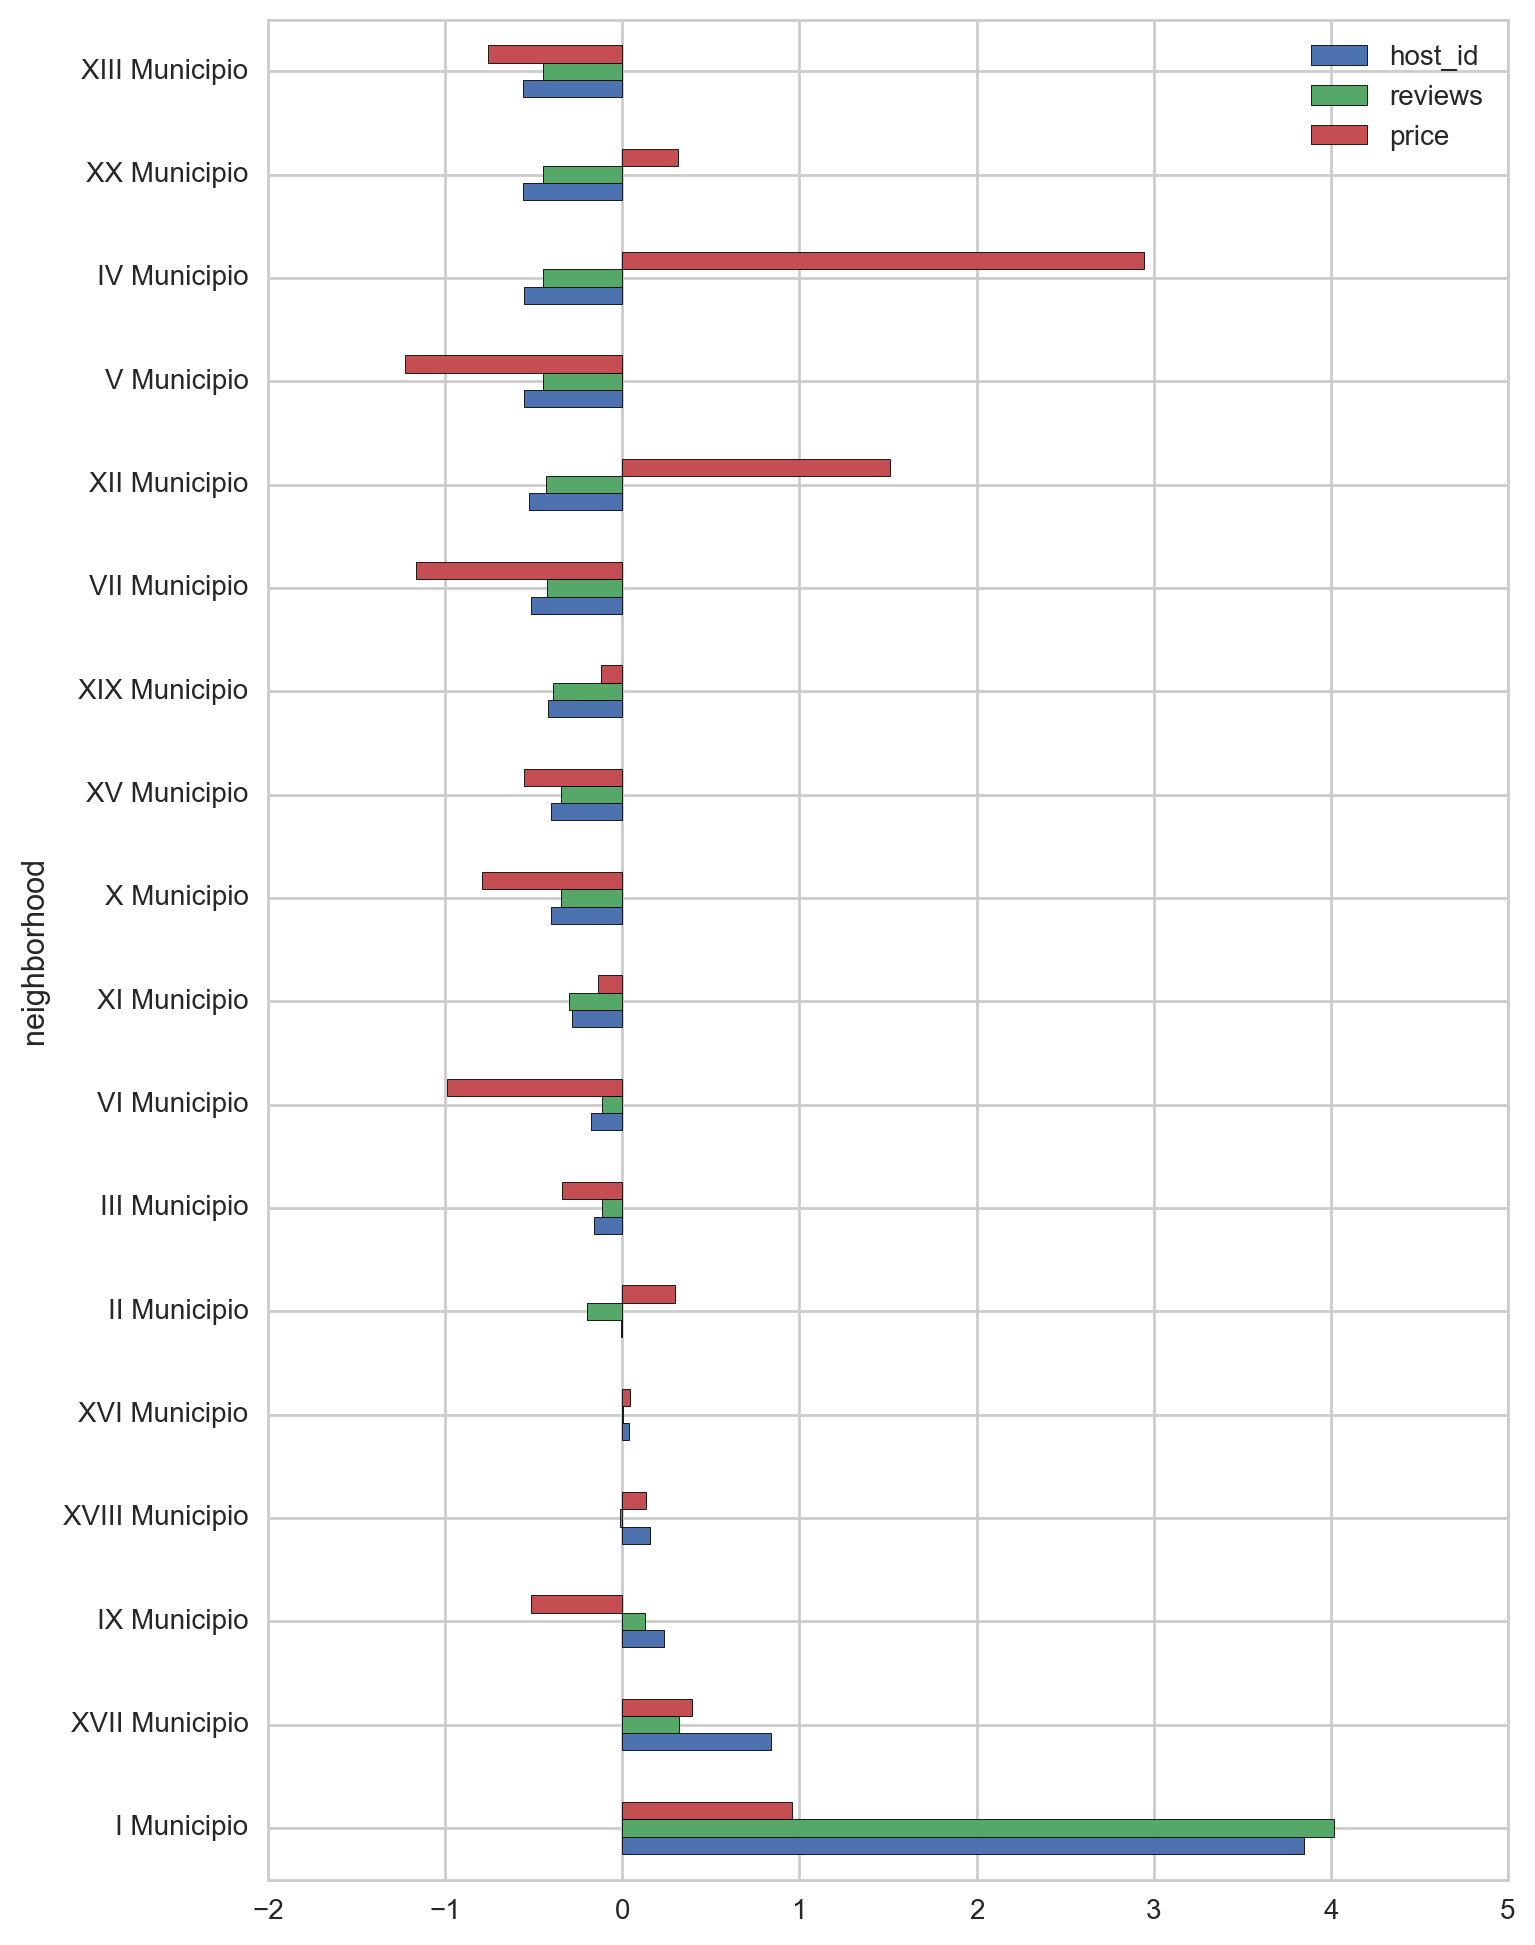

In [22]:
df1.plot(x = 'neighborhood', y = ['host_id','reviews','price'], kind ='barh', figsize =(8, 12))

In [23]:
custom = lambda x: np.average(x)
df2 = pd.DataFrame(rome.groupby(['neighborhood','room_type']).agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [24]:
df2.head(2)

reviews  host_id       price
neighborhood room_type                                    
I Municipio  Entire home/apt    91804     5026  153.069439
             Private room       27230     1776   96.228041

In [25]:
df2.reset_index(level=0, inplace=True)

In [26]:
df2.reset_index(inplace=True)

In [27]:
df2.head(2)

,room_type,neighborhood,reviews,host_id,price
0,Entire home/apt,I Municipio,91804,5026,153.069439
1,Private room,I Municipio,27230,1776,96.228041


In [28]:
df2.host_id = standardize(df2.host_id)
df2.reviews = standardize(df2.reviews)
df2.price = standardize(df2.price)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either usin

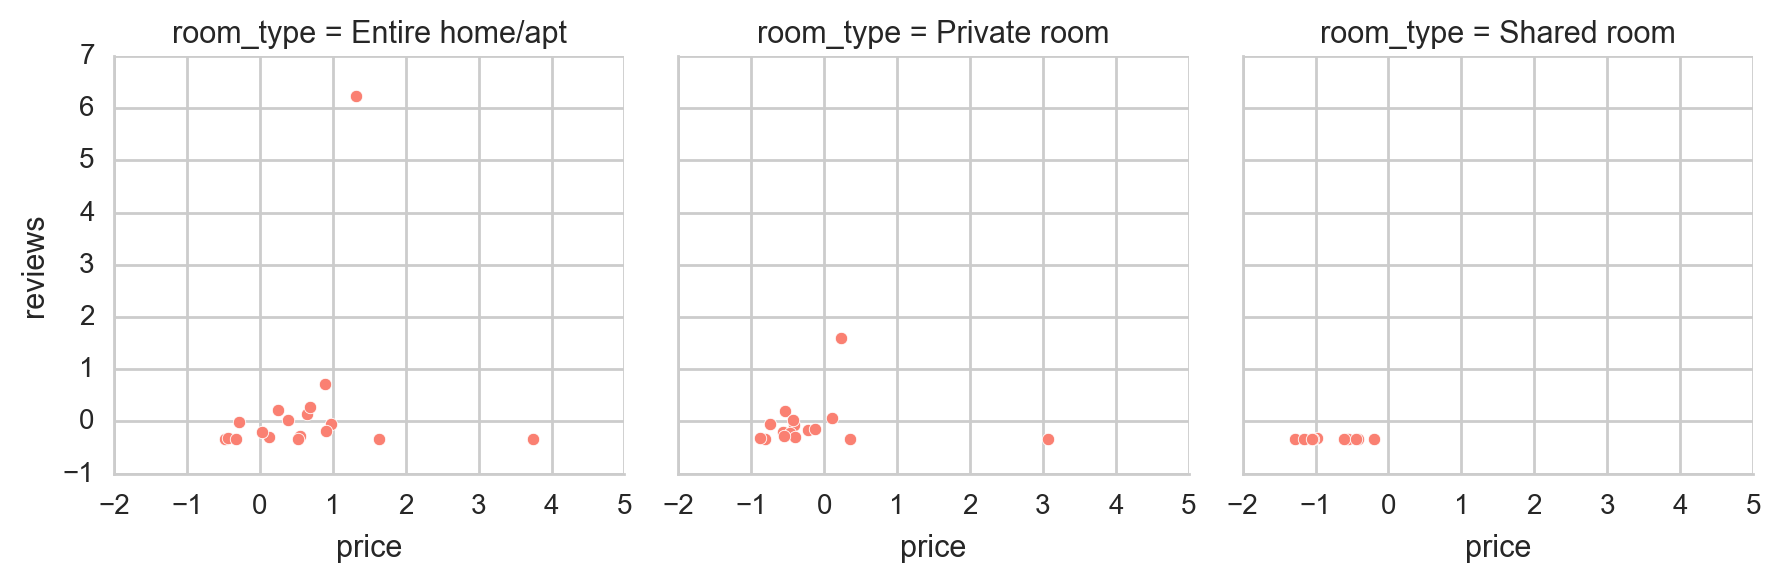

In [29]:
g = sns.FacetGrid(df2, col="room_type")
g = g.map(plt.scatter,"price","reviews", edgecolor="w", color = "salmon")

In [30]:
custom = lambda x: np.average(x)
neighborhood_data = pd.DataFrame(rome.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom, 'latitude':custom,'longitude':custom}))

In [31]:
neighborhood_data.reset_index(inplace =True)

In [32]:
neighborhood_data.head(2)

,neighborhood,reviews,host_id,price,longitude,latitude
0,I Municipio,119482,6825,137.873260,12.484311,41.895431
1,II Municipio,6737,856,110.651869,12.494261,41.922693


In [33]:
# define price

def price_color(neighborhood_data, row):
    
    price_max = np.max(neighborhood_data.price)
    price_min = np.min(neighborhood_data.price)
    
    
    if price_min <= neighborhood_data.ix[row, 'price'] < price_min + ((price_max - price_min)/3):
        return 'green'
    elif price_min + ((price_max - price_min)/3) <= neighborhood_data.ix[row, 'price'] < (price_min + 2*(price_max - price_min)/3):
        return 'orange'
    else:
        return 'red'

In [34]:
import folium

In [35]:
rome_map = folium.Map(location=[41.9027835, 12.4963655])

for each_row in range(neighborhood_data.shape[0]):
     rome_map.simple_marker(location = [neighborhood_data.ix[each_row,'latitude'],neighborhood_data.ix[each_row,'longitude']],
                            popup = str(neighborhood_data.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [36]:
rome_map

In [38]:
import json

In [39]:
with open("/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/rome-rioni.geojson") as fp:
    geodata = json.load(fp)

In [40]:
geodata.keys()

[u'type', u'features']

In [45]:
for i in range(len(geodata['features'])):
    print geodata['features'][i]['properties']['name']

Castro Pretorio
Monti
Esquilino
Sallustiano
Testaccio
Ludovisi
Trevi
Colonna
Campo Marzio
Pigna
Sant'Eustachio
Ponte
Parione
Regola
Sant'Angelo
Campitelli
Ripa
Celio
San Saba
Trastevere
Prati
Borgo


In [48]:
# for i in range(len(geodata['features'])):
#     print geodata['features'][i]['geometry']['type']

In [49]:
neighborhood_coords = {}

for i in range(len(geodata['features'])):
    neighborhood_coords[geodata['features'][i]['properties']['name']] = geodata['features'][i]['geometry']['coordinates']

In [50]:
neighborhood_coords = pd.DataFrame(neighborhood_coords.items(), columns = ['neighborhood', 'long_lat'])

In [51]:
neighborhood_coords.sort_values('neighborhood',inplace=True)

In [52]:
neighborhood_coords = neighborhood_coords.reset_index()
neighborhood_coords.drop('index', axis=1)

,neighborhood,long_lat
0,Borgo,"[[[[12.457863, 41.89854], [12.456436, 41.90037..."
1,Campitelli,"[[[[12.491069, 41.890617], [12.490339, 41.8886..."
2,Campo Marzio,"[[[[12.488279, 41.909416], [12.487035, 41.9083..."
3,Castro Pretorio,"[[[[12.490683, 41.901926], [12.494094, 41.9042..."
4,Celio,"[[[[12.491069, 41.890617], [12.491412, 41.8910..."
5,Colonna,"[[[[12.48594, 41.905104], [12.487485, 41.90559..."
6,Esquilino,"[[[[12.499566, 41.897645], [12.501583, 41.8998..."
7,Ludovisi,"[[[[12.498364, 41.910885], [12.49697, 41.90928..."
8,Monti,"[[[[12.487078, 41.899562], [12.490683, 41.9019..."
9,Parione,"[[[[12.467573, 41.897669], [12.46827, 41.89822..."


In [53]:
neighborhood_coords['longitude'] = 0
neighborhood_coords['latitude'] = 0

In [54]:
import shapely
from shapely.geometry import MultiPolygon, Point

In [55]:
# define the conversion function to convert the raw coordinates to coordinates for multipolygon

def PrepCoordsForShapely(rawcoords):
    preppedcoords = []
    #according to the geojson specs, a multipolygon is a list of linear rings, so we loop each
    for eachpolygon in rawcoords:
        #print eachpolygon
        #the first linear ring is the coordinates of the polygon, and shapely needs it to be a tuple
        tupleofcoords = tuple(eachpolygon[0])
        #the remaining linear rings, if any, are the coordinates of inner holes, and shapely needs these to be nested in a list
        if len(eachpolygon) > 1:
            listofholes = list(eachpolygon[1:])
        else:
            listofholes = []
        #shapely defines each polygon in a multipolygon with the polygoon coordinates and the list of holes nested inside a tuple
        eachpreppedpolygon = (tupleofcoords, listofholes)
        #so append each prepped polygon to the final multipolygon list
        preppedcoords.append(eachpreppedpolygon)
    #finally, the prepped coordinates need to be nested inside a list in order to be used as a star-argument for the MultiPolygon constructor.
    return [preppedcoords]

In [56]:
# Each neighborhood is made up of multiple polygons, first retrieve the coordinates 

for i in range(neighborhood_coords.shape[0]):
    rawcoords = neighborhood_coords["long_lat"][i]
    
    if geodata['features'][i]['geometry']['type'] == 'Polygon':
        poly = Polygon(neighborhood_coords.long_lat[i][0])
        neighborhood_coords.longitude[i] = poly.centroid.wkt.split()[1].split('(')[1]
        neighborhood_coords.latitude[i] = poly.centroid.wkt.split()[2].split(')')[0]
    
    else:
        
        # use the function to prepare coordinates for MultiPolygon
        preppedcoords = PrepCoordsForShapely(rawcoords)
    
       # use the prepped coordinates as a star-argument for the MultiPolygon constructor
        multipoly = MultiPolygon(*preppedcoords)
    
        neighborhood_coords.longitude[i] = multipoly.centroid.wkt.split()[1].split('(')[1]
        neighborhood_coords.latitude[i] = multipoly.centroid.wkt.split()[2].split(')')[0]



/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [57]:
neighborhood_coords.head(2)

,index,neighborhood,long_lat,longitude,latitude
0,5,Borgo,"[[[[12.457863, 41.89854], [12.456436, 41.90037...",12.46157125747993,41.90264484571895
1,14,Campitelli,"[[[[12.491069, 41.890617], [12.490339, 41.8886...",12.4857190772713,41.8908126010102


In [58]:
import folium


In [59]:
path = '/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/rome-rioni.geojson'


nbrhd_map = folium.Map(location=[41.9027835, 12.4963655],
                    zoom_start=12)
nbrhd_map.choropleth(geo_path=path, fill_opacity=0.2,
                     line_opacity=0.8, line_weight=2)

In [61]:
for each_row in range(neighborhood_data.shape[0]):
     nbrhd_map.simple_marker(location = [neighborhood_coords.ix[each_row,'latitude'],neighborhood_coords.ix[each_row,'longitude']],
                            popup = str(neighborhood_data.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [62]:
nbrhd_map

In [63]:
import xmltodict

In [64]:
with open("/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/Rome_metro_station_map.kml") as fp:

    rd_metro = xmltodict.parse(fp)

In [65]:
metro_dict = {}

for point in rd_metro['kml']['Document']['Folder']['Placemark']:
    metro_dict[point[u'name']] = point['Point'][u'coordinates'].split(",")

In [66]:
rome_metro = pd.DataFrame(metro_dict.items(), columns =['metro_stn','coordinates'])
rome_metro.head(2)

,metro_stn,coordinates
0,Circo Massimo,"[12.487857599999984, 41.8834094, 0.0]"
1,Repubblica,"[12.495804099999987, 41.902193, 0.0]"


In [67]:
rome_metro['longitude'] = rome_metro['coordinates'].map(lambda x: float(x[0]))
rome_metro['latitude'] = rome_metro['coordinates'].map(lambda x: float(x[1]))

In [68]:
for each_row in range(rome_metro.shape[0]):
     nbrhd_map.circle_marker(location = [rome_metro.ix[each_row,'latitude'],rome_metro.ix[each_row,'longitude']],
                         radius = 30,fill_color = 'blue',line_color = 'blue',fill_opacity = 0.8
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  app.launch_new_instance()


In [69]:
nbrhd_map

In [72]:
# create polygon based on polygon or multipolygon type

def polygon_create(polygon_coords, row):

    
    rawcoords = polygon_coords["long_lat"][row]
    
    if geodata['features'][row]['geometry']['type'] == 'Polygon':
        poly = Polygon(rawcoords[0])
    
        return poly
    
    else:
        
        # use the function to prepare coordinates for MultiPolygon
        preppedcoords = PrepCoordsForShapely(rawcoords)
    
       # use the prepped coordinates as a star-argument for the MultiPolygon constructor
        multipoly = MultiPolygon(*preppedcoords)
    
        return multipoly
    

In [73]:
# finding the number of metro stations in each neighborhood

import shapely
from shapely.geometry import Polygon, Point


def dot_count(polygon_coords, dot_coords):
    count_dict = {}

    for row in range(polygon_coords.shape[0]):
        poly = polygon_create(polygon_coords, row)
        count = 0
        for i in range(dot_coords.shape[0]):
            point = Point(dot_coords.ix[i,'longitude'],dot_coords.ix[i,'latitude'])
            #print point
        
            if poly.contains(point):
                count = count + 1
        #print count
        nbrhd_name = polygon_coords.ix[row,'neighborhood']
        count_dict[nbrhd_name] = count
    
    return count_dict

In [74]:
metrostn_count = dot_count(neighborhood_coords, rome_metro)

In [75]:
metrostn_count = pd.DataFrame(metrostn_count.items(),columns=['neighborhood','stn_count'])

In [76]:
metrostn_count.sort_values('neighborhood',inplace=True)

In [77]:
metrostn_count = metrostn_count.reset_index()

In [78]:
metrostn_count

,index,neighborhood,stn_count
0,11,Borgo,0
1,14,Campitelli,0
2,8,Campo Marzio,1
3,1,Castro Pretorio,2
4,3,Celio,0
5,16,Colonna,0
6,5,Esquilino,3
7,0,Ludovisi,0
8,19,Monti,2
9,21,Parione,0
